# 452 - Machine Learning - Assignment 6 : Diamond Clustering

Primary Requirements :
- Create K-Means clustering Juypter Notebook of a public dataset
- Create a faceted ggplot of a K-Means cluster of a public dataset

This classic dataset "Diamonds" contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

- price: price in US dollars (\$326--\$18,823)

- carat: weight of the diamond (0.2-5.01)

- cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)

- color: diamond colour, from J (worst) to D (best)

- clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

- x: length in mm (0--10.74)

- y: width in mm (0--58.9)

- z: depth in mm (0--31.8)

- depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

- table: width of top of diamond relative to widest point (43--95)

Our aim is to fulfill the above requirements and cluster diamonds with a given set of properties. We use K-means clustering technique from the sci-kit package.

In [6]:
# Import the required libraries/packages

# For data loading and manipulation
import pandas as pd
import numpy as np
from random import *

# For data science and machine learning techniques
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples

# For data visualization
from ggplot import *
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
sns.set(style="white")
%matplotlib inline
from matplotlib import cm

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the input dataset and display the first few records
diamonds_df = pd.read_csv("diamonds.csv");diamonds_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


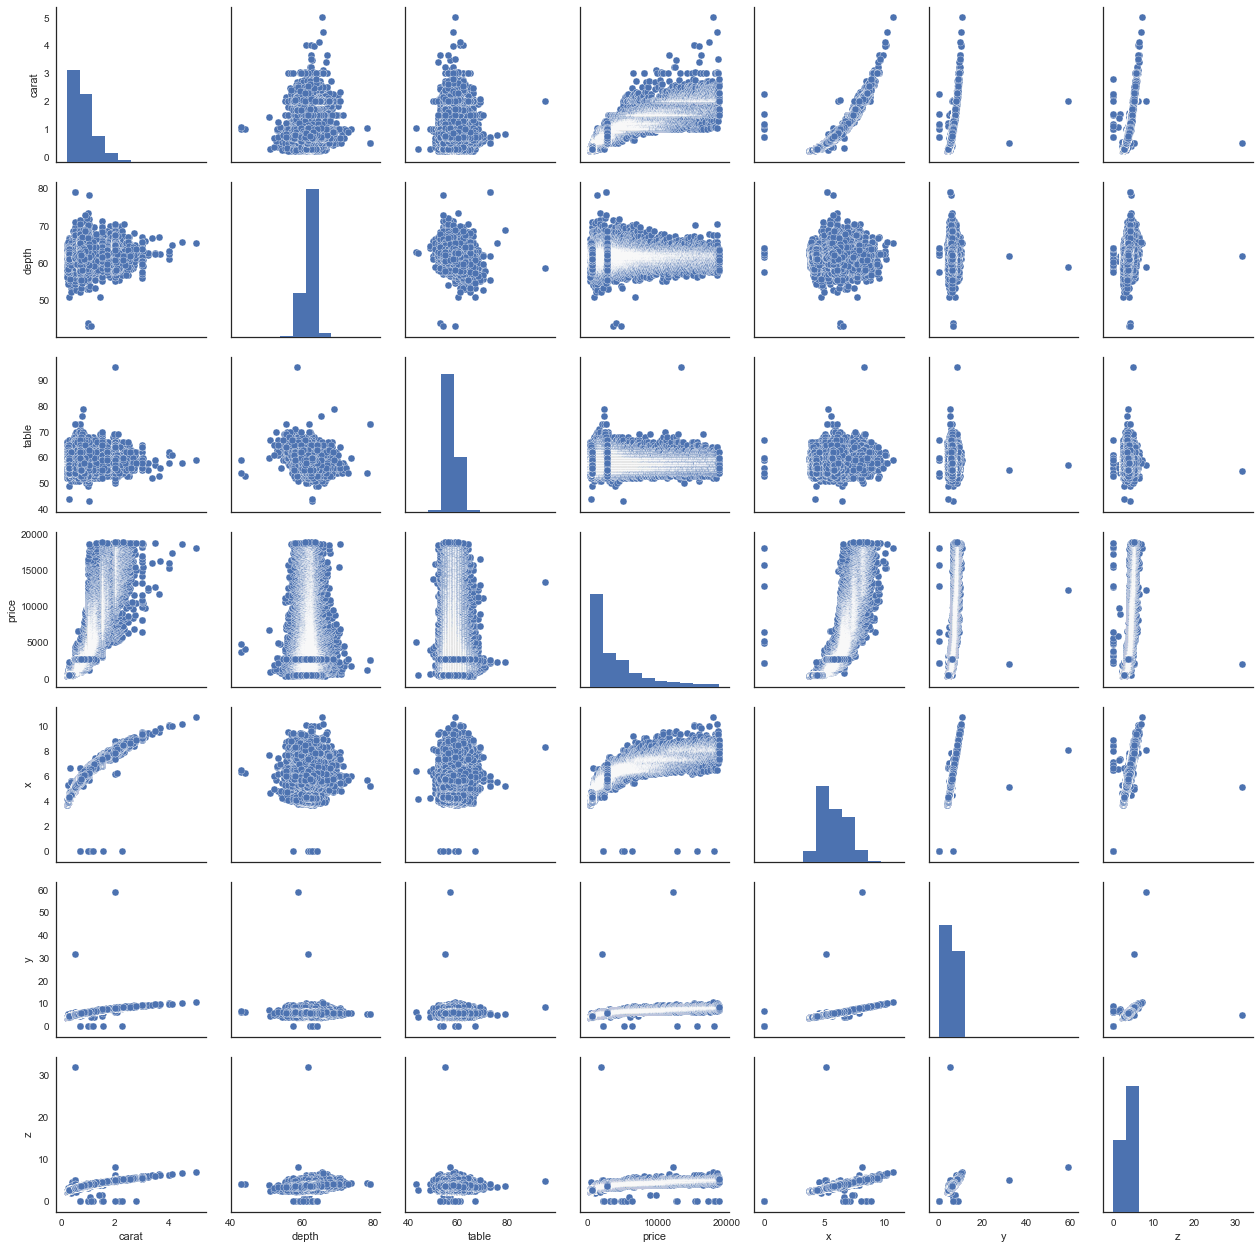

In [3]:
# Explore the numeric variables using a pairplot grouped by cut
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
sns.pairplot(diamonds_df)

Based on the pairplot, there is some information available on the differentiating properties of diamonds. Although there are some positive and negative correlations, the most informative piece is the histograms. We can see that price, carat, and x seem to have a wide range of diamonds so these three seem to be good dimensions to look at for clustering. But x has a high positive correlation with the other two, so we can drop that as well.

Let us confirm that with a correlation heatmap.

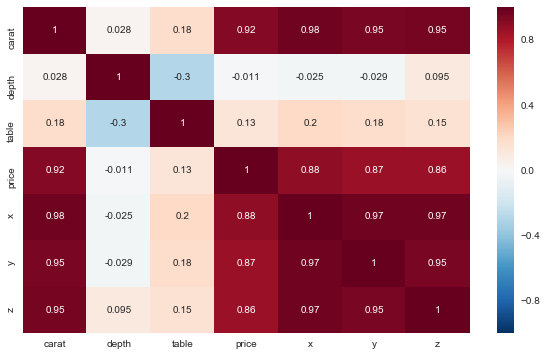

In [5]:
# Check the correlation among the variables
plt.subplots(figsize=(10,6))
sns.heatmap(diamonds_df.corr(),annot=True)

Now, let us take a look at the distribution of price and carat by diamond cut, clarity and color.

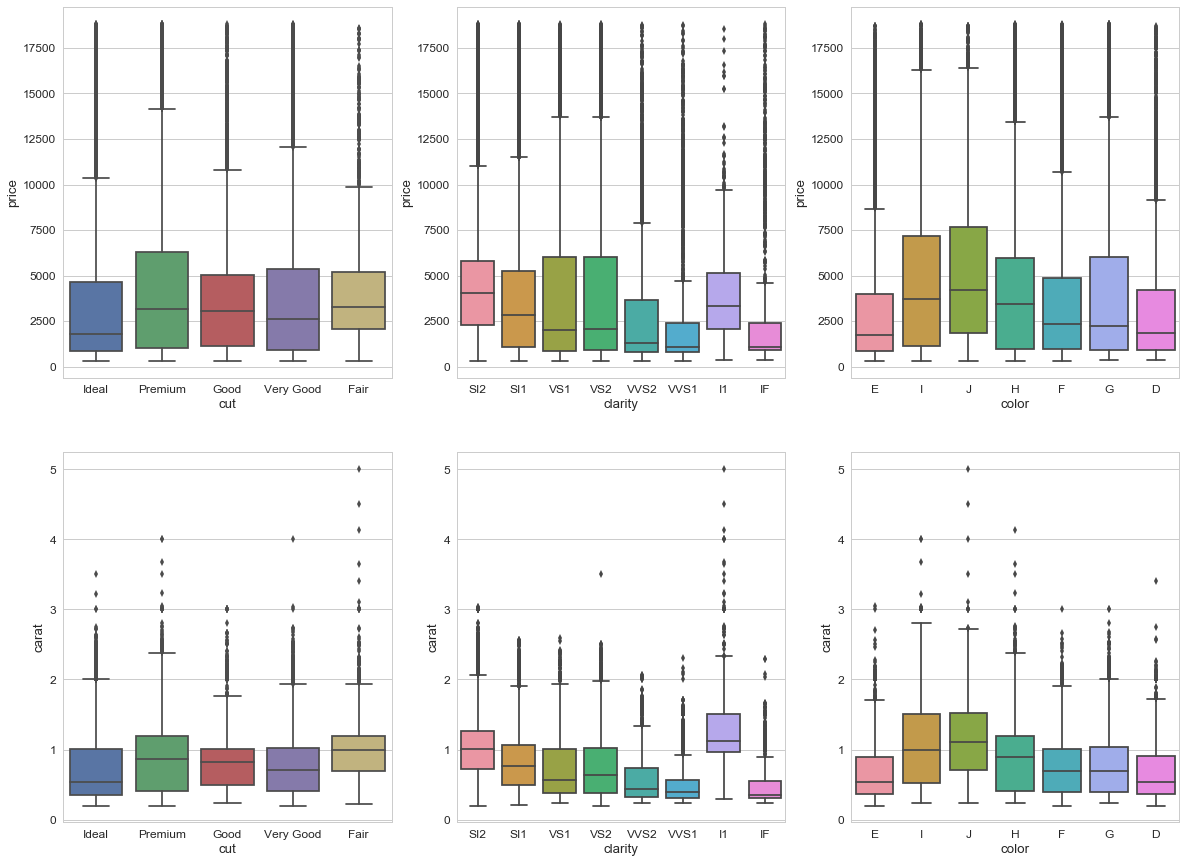

In [6]:
sns.set(style="whitegrid", font_scale=1.2)
plt.subplots(figsize = (20,15))
plt.subplot(2,3,1)
sns.boxplot(x='cut', y='price', data=diamonds_df)
plt.subplot(2,3,2)
sns.boxplot(x='clarity', y='price', data=diamonds_df)
plt.subplot(2,3,3)
sns.boxplot(x='color', y='price', data=diamonds_df)
plt.subplot(2,3,4)
sns.boxplot(x='cut', y='carat', data=diamonds_df)
plt.subplot(2,3,5)
sns.boxplot(x='clarity', y='carat', data=diamonds_df)
plt.subplot(2,3,6)
sns.boxplot(x='color', y='carat', data=diamonds_df)
plt.show()

For clustering, we will use K-means technique using all the numerical variables. First, we will standardize all the variables and then run elbow method to decide on the optimal number of clusters.

In [3]:
# Standardize the variables
diamonds_std = diamonds_df[['price','carat','depth','table','x','y','z']]
scaler = MinMaxScaler()
scaler.fit(diamonds_std)
scaler.transform(diamonds_std)

array([[  0.00000000e+00,   6.23700624e-03,   5.13888889e-01, ...,
          3.67783985e-01,   6.75721562e-02,   7.64150943e-02],
       [  0.00000000e+00,   2.07900208e-03,   4.66666667e-01, ...,
          3.62197393e-01,   6.51952462e-02,   7.26415094e-02],
       [  5.40628210e-05,   6.23700624e-03,   3.86111111e-01, ...,
          3.77094972e-01,   6.91001698e-02,   7.26415094e-02],
       ..., 
       [  1.31426718e-01,   1.03950104e-01,   5.50000000e-01, ...,
          5.27001862e-01,   9.64346350e-02,   1.11949686e-01],
       [  1.31426718e-01,   1.37214137e-01,   5.00000000e-01, ...,
          5.72625698e-01,   1.03904924e-01,   1.17610063e-01],
       [  1.31426718e-01,   1.14345114e-01,   5.33333333e-01, ...,
          5.42830540e-01,   9.96604414e-02,   1.14465409e-01]])

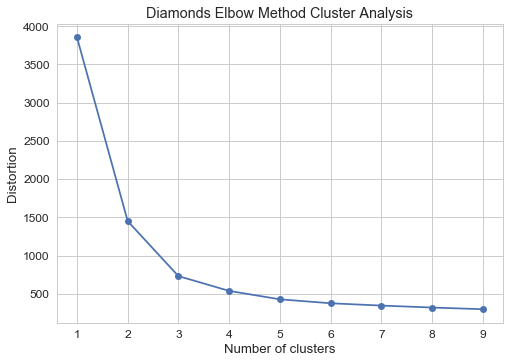

In [8]:
# Use elbow method to decide on the ideal number of clusters
distortions = []
for i in range(1, 10):
    km = KMeans(n_clusters=i,
            init='k-means++',
            n_init=10,
            max_iter=300,
            random_state=0)
    km.fit(scaler.transform(diamonds_std))
    distortions.append(km.inertia_)
    
plt.plot(range(1,10), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title("Diamonds Elbow Method Cluster Analysis")
plt.show()

From the elbow plot, 3 seems to be an ideal choice for number of clusters. Let's run k-means with 3 clusters.

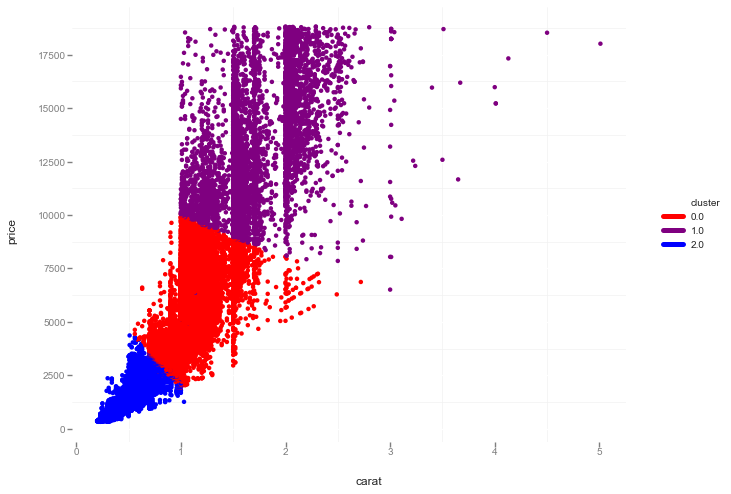

<ggplot: (287455850)>

In [4]:
km = KMeans(n_clusters=3,
            init='k-means++',
            n_init=10,
            max_iter=300,
            random_state=0)
kmeans = km.fit(scaler.transform(diamonds_std))
y_km = km.fit_predict(scaler.transform(diamonds_std))
diamonds_df['cluster'] = kmeans.labels_
ggplot(diamonds_df, aes(x="carat", y="price", color="cluster")) +\
geom_point() + scale_color_gradient(low = 'red', high = 'blue') + theme_bw()

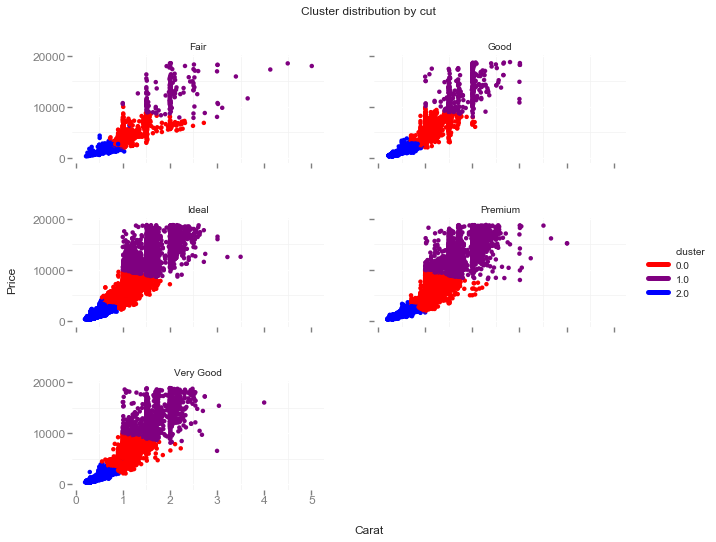

<ggplot: (-9223372036545041292)>

In [13]:
# Plot the clusters using ggplot with facet as cut
ggplot(diamonds_df, aes(x="carat", y="price", color="cluster")) +\
geom_point() + scale_color_gradient(low = 'red', high = 'blue') +\
theme_bw() + facet_wrap("cut") +\
xlab("Carat") +\
ylab("Price") +\
ggtitle("Cluster distribution by cut")

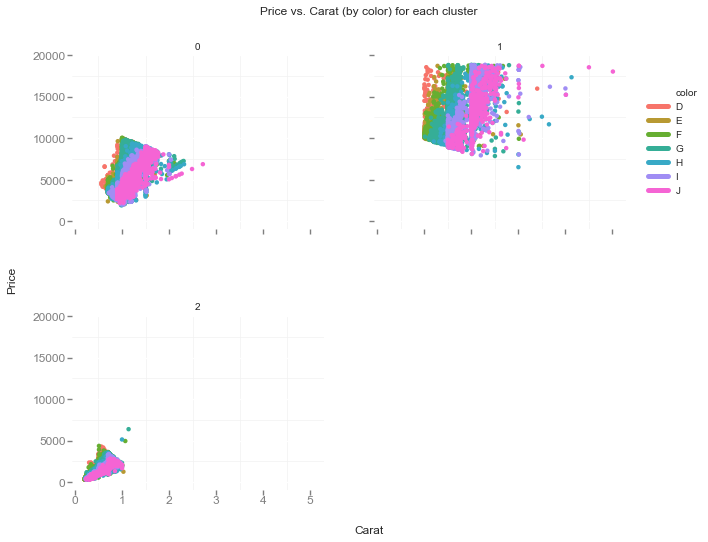

<ggplot: (-9223372036540672112)>

In [14]:
# Create a faceted plot in ggplot of each cluster
ggplot(diamonds_df, aes(x="carat", y="price", color="color")) +\
geom_point() +\
theme_bw() + facet_wrap("cluster") +\
xlab("Carat") +\
ylab("Price") +\
ggtitle("Price vs. Carat (by color) for each cluster")

Let us create a silhouette plot to see if the clustering was optimal or not.

In [30]:
# create a subset of the clusters as the silhoutte plot is memory intensive and cannot handle 54k rows at one time
diamonds_std['y_km'] = y_km
df0 = diamonds_std[diamonds_std.y_km == 0]
df1 = diamonds_std[diamonds_std.y_km == 1]
df2 = diamonds_std[diamonds_std.y_km == 2]
final_df = df0.head(5000).append(df1.head(5000)).append(df2.head(5000))
final_x = final_df.drop('y_km', axis=1)
final_y = final_df['y_km']

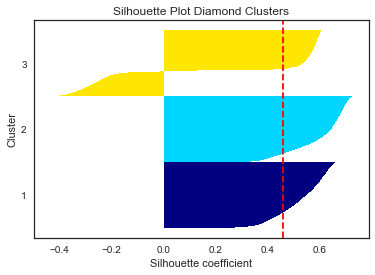

In [31]:
cluster_labels = np.unique(final_y)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(scaler.transform(final_x),
                                     final_y,
                                     metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[final_y == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i)/n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none',color=color)
    yticks.append((y_ax_lower + y_ax_upper)/2)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,
            color="red",
            linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.title('Silhouette Plot Diamond Clusters')
plt.show()

Silhoutte coefficients indicate how well the data points into a cluster. Large coefficient (close to 1) mean good clusters, whereas small coefficients (close to 0) mean the points lie between two clusters. Negative coefficient means that those points are placed in the wrong cluster. In our case, the lower part of the yellow cluster indicates the same. However, since it is a small subset of the data which was used for clustering, it is not representative of the entire data points in a cluster. This plot is just a demonstration of a the silhoutte plot analysis.